In [1]:
bookspath="file:///home/shubham/Downloads/nayadata/Books.txt"
characterspath="file:///home/shubham/Downloads/nayadata/Characters.txt"
edgespath="file:///home/shubham/Downloads/nayadata/Edges.txt"

In [2]:
books = sc.textFile(bookspath)
characters = sc.textFile(characterspath)
edges = sc.textFile(edgespath)

In [3]:
books.take(10)

#We can see vertex name and book name

[u'Vertex 6487: AA2 35',
 u'Vertex 6488: M/PRM 35',
 u'Vertex 6489: M/PRM 36',
 u'Vertex 6490: M/PRM 37',
 u'Vertex 6491: WI? 9',
 u'Vertex 6492: AVF 4',
 u'Vertex 6493: AVF 5',
 u'Vertex 6494: H2 251',
 u'Vertex 6495: H2 252',
 u'Vertex 6496: COC 1']

In [4]:
characters.take(10)

#We can see vertex name and character name

[u'Vertex 1: 24-HOUR MAN/EMMANUEL',
 u'Vertex 2: 3-D MAN/CHARLES CHANDLER & HAROLD CHANDLER',
 u'Vertex 3: 4-D MAN/MERCURIO',
 u'Vertex 4: 8-BALL/',
 u'Vertex 5: A',
 u"Vertex 6: A'YIN",
 u'Vertex 7: ABBOTT, JACK',
 u'Vertex 8: ABCISSA',
 u'Vertex 9: ABEL',
 u'Vertex 10: ABOMINATION/EMIL BLONSKY']

In [5]:
edges.take(10)

#Here itstarts with vertices 

[u'*Vertices 19428 6486',
 u'1 "24-HOUR MAN/EMMANUEL"',
 u'2 "3-D MAN/CHARLES CHAN"',
 u'3 "4-D MAN/MERCURIO"',
 u'4 "8-BALL/"',
 u'5 "A"',
 u'6 "A\'YIN"',
 u'7 "ABBOTT, JACK"',
 u'8 "ABCISSA"',
 u'9 "ABEL"']

In [6]:
#We require a filter function so that would filter out any rows about the vertices and keep only the rows which contain edges

def edgefilter(row):
    if '*' in row or '"' in row:
        return False
    else:
        return True
    

#By examining the pattern of rows containing edges & rows containing vertices , we noticed that has a Star or a quote  in te row.
#Whereas rows containing edges don't have these special characters
#So we can filter out only the edges

edgesfiltered = edges.filter(edgefilter)

In [7]:
edgesfiltered.take(10)

#We know have only edges that connects characters to books

[u'1 6487',
 u'2 6488 6489 6490 6491 6492 6493 6494 6495 6496',
 u'3 6497 6498 6499 6500 6501 6502 6503 6504 6505',
 u'4 6506 6507 6508',
 u'5 6509 6510 6511',
 u'6 6512 6513 6514 6515',
 u'7 6516',
 u'8 6517 6518',
 u'9 6519 6520',
 u'10 6521 6522 6523 6524 6525 6526 6527 6528 6529 6530 6531 6532 6533 6534 6535']

In [10]:
#Finding the most influential characters, these will be one which are connected to most numbers df books
#Now spliting string into individual elements and then the first element of that list is a character.
#The rest of the elements are the books


characterbookmap = edgesfiltered.map(lambda x:x.split())\
                    .map(lambda x : (x[0],x[1:]))




In [11]:
characterbookmap.take(10)

#So we have a map now that connects to the list of books in which that character appears.
#Now we need to take this list and count the number of elements to get number of books in which character has appeared.

[(u'1', [u'6487']),
 (u'2',
  [u'6488',
   u'6489',
   u'6490',
   u'6491',
   u'6492',
   u'6493',
   u'6494',
   u'6495',
   u'6496']),
 (u'3',
  [u'6497',
   u'6498',
   u'6499',
   u'6500',
   u'6501',
   u'6502',
   u'6503',
   u'6504',
   u'6505']),
 (u'4', [u'6506', u'6507', u'6508']),
 (u'5', [u'6509', u'6510', u'6511']),
 (u'6', [u'6512', u'6513', u'6514', u'6515']),
 (u'7', [u'6516']),
 (u'8', [u'6517', u'6518']),
 (u'9', [u'6519', u'6520']),
 (u'10',
  [u'6521',
   u'6522',
   u'6523',
   u'6524',
   u'6525',
   u'6526',
   u'6527',
   u'6528',
   u'6529',
   u'6530',
   u'6531',
   u'6532',
   u'6533',
   u'6534',
   u'6535'])]

In [12]:
#But importantly we have to create a dictionary which have character ID(Vertices number) and name of the character.

def charparse(row):
    row = row.split(":")
    return (row [0][7:],row[1].strip())

characterlookup = characters.map(charparse).collectAsMap()

In [13]:
characterlookup

#Which is the required dictionary which we can use later on to look for character

{u'5988': u'VALKYRIE II | MUTANT X-VERSE',
 u'5989': u'VALKYRIE IV',
 u'5982': u'VAGABOND/PRISCILLA LYONS',
 u'5983': u'VAGUE/',
 u'5980': u'UTGARD-LOKI',
 u'5981': u'VACUUM',
 u'5986': u'VALINOR',
 u'5987': u'VALKIN',
 u'5984': u'VAKUME',
 u'5985': u'VALERIA',
 u'6294': u'WOLF SPIRIT/OWAYODATA',
 u'270': u'AUGUST PERSONAGE IN JADE/YU-TI',
 u'271': u'AUNTIE FREEZE/',
 u'272': u'AURA/ANN HERD',
 u'273': u'AURIC/',
 u'274': u'AURORA/JEANNE-MARIE BAUBIER',
 u'275': u'AURORA DOPPELGANGER',
 u'276': u'AURORA | MUTANT X-VERSE',
 u'277': u'AUSTIN, GEN.',
 u'278': u'AUSTIN, SUSAN',
 u'279': u'AUSTIN, TERRY',
 u'2143': u'GLADIATRIX',
 u'2142': u'GLADIATOR II',
 u'3519': u'MASTER OM',
 u'3518': u'MASTER OF VENGEANCE',
 u'3513': u'MASTER MENACE/DR. EMIL BURBANK',
 u'3512': u'MASTER MAN II/ALEXANDER',
 u'3511': u'MASTER MAN/WILHELM LOHMER GSINV 1',
 u'3510': u'MASTER LINK/WILLIS HAYWORTH',
 u'3517': u'MASTER MONARCH/',
 u'3516': u'MASTER MOLD III',
 u'3515': u'MASTER MOLD II',
 u'3514': u'MASTER M

In [16]:
characterstrength = characterbookmap.mapValues(lambda x:len(x))\
                    .map(lambda x: (characterlookup[x[0]],x[1]))\
                    .reduceByKey(lambda x,y:x+y)\
                    .sortBy(lambda x:-x[1])

#This MapValues will do the mapping but only in the values portion of pair RDD
#Now we are mapping keys from vertices ID to actual character names 
#There is no Mapkeys operation in spark 


In [17]:
characterstrength.take(10)

#Top 10 most influential character in Marvel Series

[(u'SPIDER-MAN/PETER PARKER', 1625),
 (u'CAPTAIN AMERICA', 1367),
 (u'IRON MAN/TONY STARK', 1168),
 (u'THING/BENJAMIN J. GRIMM', 990),
 (u'THOR/DR. DONALD BLAKE/SIGURD JARLSON II/JAKE OLSON/LOREN OLSON', 965),
 (u'HUMAN TORCH/JOHNNY STORM', 908),
 (u'MR. FANTASTIC/REED RICHARDS', 875),
 (u'HULK/DR. ROBERT BRUCE BANNER', 841),
 (u'WOLVERINE/LOGAN', 820),
 (u'INVISIBLE WOMAN/SUE STORM RICHARDS', 782)]

In [ ]:
#Building a Co-occurence network
#this network would have charaters as vertices and the relationship between characters as edges.
#Step 1 : Character to bookmap and reverse it to get a bookCharacterMap
#Step 2 : We will take this map and generate a complete list of all pairs of characters which are present in the book.
#Step 3 : ReduceByKey operation and make the edge the Key. Then we will get a count of total number of appearances of that pair

In [21]:
bookcharactermap = characterbookmap.flatMapValues(lambda x: x)\
                    .map(lambda x: (x[1], x[0]))\
                    .reduceByKey(lambda x,y: x+","+y)\
                    .mapValues(lambda x: x.split(","))


#Flatmapvalues function to take the list of books that the character appears in and break it up into individual record

In [23]:
#For each book we wish to generate a comlete list of all the pairs that can appear in the book

import itertools
cooccurencemap = bookcharactermap.flatMap(lambda x: list(itertools.combinations(x[1],2)))

In [24]:
#Co-occurence Map is an RDD in which each RDD is a record and is a pair of characters that have appeared once in a book.

cooccurencemap.take(10)

[(u'545', u'1084'),
 (u'545', u'1319'),
 (u'545', u'4415'),
 (u'1084', u'1319'),
 (u'1084', u'4415'),
 (u'1319', u'4415'),
 (u'545', u'1084'),
 (u'545', u'1319'),
 (u'545', u'1347'),
 (u'545', u'1602')]

In [25]:
#To compute a co-occurence netwrok all we need to do is to map each pair to a tuple of pair,1 so that we can have count.

cooccurencestrength = cooccurencemap.map(lambda x: (x,1))\
                                .reduceByKey(lambda x,y : x+y)

In [26]:
cooccurencestrength.take(10)

#So co-occurence strength has key value pairs where keys are the edges connecting to characters and the values are the strength of those edges.


[((u'2558', u'3757'), 3),
 ((u'3770', u'4483'), 1),
 ((u'4621', u'6452'), 1),
 ((u'5164', u'6000'), 2),
 ((u'1567', u'5705'), 1),
 ((u'4860', u'6242'), 1),
 ((u'3987', u'5978'), 2),
 ((u'1948', u'4288'), 3),
 ((u'1286', u'6166'), 2),
 ((u'4726', u'4984'), 2)]

In [27]:
cooccurenceedges = cooccurencestrength.map(lambda x: (x[0][0],x[0][1],x[1]))

In [28]:
cooccurenceedges.take(10)

#Characters connected through edges and the strength of those edges

[(u'2558', u'3757', 3),
 (u'3770', u'4483', 1),
 (u'4621', u'6452', 1),
 (u'5164', u'6000', 2),
 (u'1567', u'5705', 1),
 (u'4860', u'6242', 1),
 (u'3987', u'5978', 2),
 (u'1948', u'4288', 3),
 (u'1286', u'6166', 2),
 (u'4726', u'4984', 2)]

In [31]:
#Finding the most important relationships
#The higher the edge weight the stronger the relationship between two characters
sortedcooccurence = cooccurenceedges\
                    .sortBy(lambda x:-x[2])\
                    .map(lambda x: (characterlookup[x[0]],characterlookup[x[1]],x[2]))


In [32]:
sortedcooccurence.take(10)

#Here we are able to get the top 10 relationships in the marvel universe.
#The first 6 are the inter-relationships of Fantastic four

[(u'HUMAN TORCH/JOHNNY STORM', u'THING/BENJAMIN J. GRIMM', 744),
 (u'HUMAN TORCH/JOHNNY STORM', u'MR. FANTASTIC/REED RICHARDS', 713),
 (u'MR. FANTASTIC/REED RICHARDS', u'THING/BENJAMIN J. GRIMM', 708),
 (u'INVISIBLE WOMAN/SUE STORM RICHARDS', u'MR. FANTASTIC/REED RICHARDS', 701),
 (u'HUMAN TORCH/JOHNNY STORM', u'INVISIBLE WOMAN/SUE STORM RICHARDS', 694),
 (u'INVISIBLE WOMAN/SUE STORM RICHARDS', u'THING/BENJAMIN J. GRIMM', 668),
 (u'SPIDER-MAN/PETER PARKER', u'WATSON-PARKER, MARY JANE', 616),
 (u'JAMESON, J. JONAH', u'SPIDER-MAN/PETER PARKER', 526),
 (u'CAPTAIN AMERICA', u'IRON MAN/TONY STARK', 446),
 (u'SCARLET WITCH/WANDA MAXIMOFF', u'VISION', 422)]

In [33]:
#Strongest relationship for a particular character

sortedcooccurence\
.filter(lambda x: "SPIDER-MAN/PETER PARKER" in x)\
.take(10)

[(u'SPIDER-MAN/PETER PARKER', u'WATSON-PARKER, MARY JANE', 616),
 (u'JAMESON, J. JONAH', u'SPIDER-MAN/PETER PARKER', 526),
 (u'PARKER, MAY', u'SPIDER-MAN/PETER PARKER', 380),
 (u'ROBERTSON, JOE', u'SPIDER-MAN/PETER PARKER', 356),
 (u'LEEDS, BETTY BRANT', u'SPIDER-MAN/PETER PARKER', 249),
 (u'SPIDER-MAN/PETER PARKER', u'THOMPSON, EUGENE FLASH', 240),
 (u'OSBORN, HARRY', u'SPIDER-MAN/PETER PARKER', 181),
 (u'HUMAN TORCH/JOHNNY STORM', u'SPIDER-MAN/PETER PARKER', 147),
 (u'CAPTAIN AMERICA', u'SPIDER-MAN/PETER PARKER', 145),
 (u'OSBORN, LIZ ALLAN', u'SPIDER-MAN/PETER PARKER', 138)]

In [34]:
sortedcooccurence\
.filter(lambda x: "CAPTAIN AMERICA" in x)\
.take(10)

[(u'CAPTAIN AMERICA', u'IRON MAN/TONY STARK', 446),
 (u'CAPTAIN AMERICA',
  u'THOR/DR. DONALD BLAKE/SIGURD JARLSON II/JAKE OLSON/LOREN OLSON',
  386),
 (u'CAPTAIN AMERICA', u'VISION', 385),
 (u'CAPTAIN AMERICA', u'WASP/JANET VAN DYNE PYM', 384),
 (u'CAPTAIN AMERICA', u'SCARLET WITCH/WANDA MAXIMOFF', 374),
 (u'CAPTAIN AMERICA', u'HAWK', 322),
 (u'ANT-MAN/DR. HENRY J. PYM', u'CAPTAIN AMERICA', 295),
 (u'CAPTAIN AMERICA', u'JARVIS, EDWIN', 244),
 (u'CAPTAIN AMERICA', u'WONDER MAN/SIMON WILLIAMS', 216),
 (u'CAPTAIN AMERICA', u'FALCON/SAM WILSON', 189)]

In [36]:
#Now extracting the edge weight from our sorted RDD

sortedcooccurence.map(lambda x:x[2]).stats()

(count: 168267, mean: 3.38610660438, stdev: 10.9184820652, max: 744.0, min: 1.0)

In [37]:
#Now we can bin the range in intervals of 10 and then we can count how many edges appeared in each interval
#this gives the frequency distribution of each edge weight

sortedcooccurence.map(lambda x: int(x[2]/10)).countByValue()

defaultdict(int,
            {0: 159249,
             1: 5621,
             2: 1405,
             3: 641,
             4: 375,
             5: 218,
             6: 162,
             7: 126,
             8: 82,
             9: 78,
             10: 44,
             11: 41,
             12: 45,
             13: 17,
             14: 19,
             15: 16,
             16: 11,
             17: 7,
             18: 17,
             19: 3,
             20: 9,
             21: 5,
             22: 5,
             23: 6,
             24: 7,
             25: 5,
             26: 8,
             27: 3,
             28: 2,
             29: 5,
             30: 7,
             31: 2,
             32: 1,
             33: 3,
             34: 2,
             35: 1,
             37: 2,
             38: 5,
             39: 1,
             40: 1,
             42: 1,
             44: 1,
             52: 1,
             61: 1,
             66: 1,
             69: 1,
             70: 2,
             71: 1,
  

In [38]:
import networkx as nx 

g = nx.Graph()
edges = sortedcooccurence.map(lambda x: (x[0],x[1],{'weight':1000/x[2]})).take(50)

g.add_edges_from(edges)

/home/shubham/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


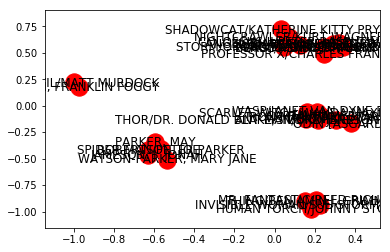

In [39]:
import matplotlib.pyplot as plt
nx.draw_networkx(g, pos=nx.spring_layout(g))
plt.show()